In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn

%matplotlib inline

from utils import tokenizer
from wordcloud import WordCloud
import nltk
from nltk import FreqDist
import json

In [25]:
# from: http://neuro.imm.dtu.dk/wiki/LabMT 

url = 'http://www.plosone.org/article/fetchSingleRepresentation.action?uri=info:doi/10.1371/journal.pone.0026752.s001'
labmt = pd.read_csv(url, skiprows=2, sep='\t', index_col=0)
 
average = labmt.happiness_average.mean()
happiness = (labmt.happiness_average - average).to_dict()
 
def score_emotion(text):
    words = tokenizer.tokenize_strip_non_words(text)
    return sum([happiness.get(word.lower(), 0.0) for word in words]) / len(words)

In [22]:
with open("data/metalness.json", "r") as f:
    metalness = json.load(f)
    f.close()
    
def score_metal(text):
    words = tokenizer.tokenize_strip_non_words(text)
    return sum(metalness.get(word,0) for word in words) / len(words)    

In [13]:
lyrics = pd.read_csv("data/lyrics.csv")

lyrics.sample(10)

,song_name,album_name,band_name,lyrics
63160,Burning,alone,solitudeaeturnus,"Thoughts collide, raping shreds of sanity\nInv..."
120885,Pride vs,shamofperfection,tystnaden,I want to push my life so strong\nBut now I am...
69630,Requiem,thefuneralmarch,gadget,"The shadows have grown longer\nTime is up, rea..."
121054,The Fallen,ungodly,abominant,"I'll take all that you have Take what, what I ..."
44924,Experience Your Flesh,carnivoresublime,benighted,Without touching me I feel\nYour delicate hand...
118521,Last Harangue Of The Unchained Mind,anextravaganceofnorm,aeon6294,Let me cross the frontiers of pity\nMomentaril...
163887,Warlok,thelosttracksofdanzig,danzig,warlock stole her soul away\nbecause she broke...
25117,Solitude In Torture,throughsicknessanddeath,melankoly,Follow no higher power\nBeware of their disgui...
150326,The Portrait,inconcert1987abigail,kingdiamond,"\n""My mother was obsessed by evil jealousy\nsh..."
84317,"If It Ain't Broke, Break It",thievingfromthehouseofgod,orangegoblin,"Look at the grudge I bear, d'ya think I wanna ..."


In [36]:
metallica_albums = {
    'andjusticeforall': 1988, 
    'deathmagnetic': 2008,
    'garageinc': 1998,
    'killemall': 1983,
    'load': 1996,
    'masterofpuppets': 1986,
    'metallicablackalbum': 1991, 
    'reload': 1997, 
    'ridethelightning': 1984,
}

In [49]:
metallica = (
    lyrics
    [lyrics.band_name == "metallica"]
    .groupby("album_name")
    .lyrics
    .apply(lambda x: " ".join(x))
    .reset_index()
)

metallica = metallica[metallica.album_name.isin(metallica_albums.keys())].copy()
metallica["year"] = metallica.album_name.apply(lambda x: metallica_albums.get(x))

metallica["metalness"] = metallica.lyrics.apply(score_metal)
metallica["emotion"] = metallica.lyrics.apply(score_emotion)

metallica.sort_values("year", inplace=True)

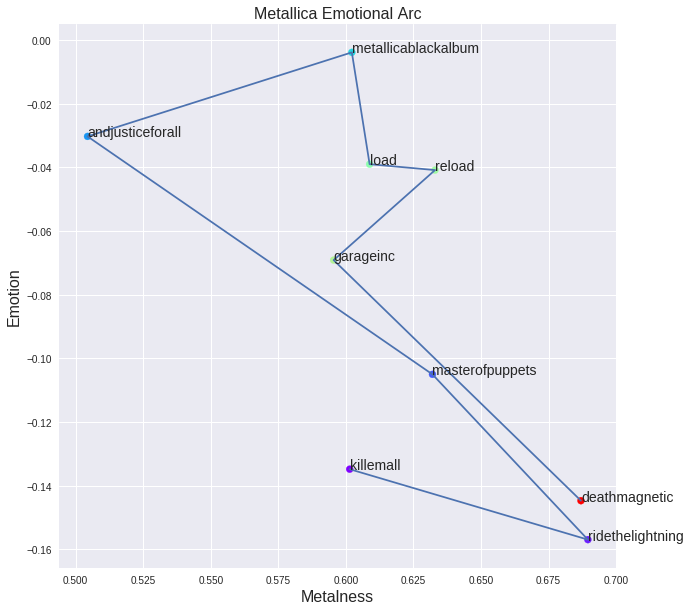

In [95]:
x = metallica.metalness.values
y = metallica.emotion.values
c = metallica.year.values
l = metallica.album_name.values

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.scatter(x,y,c=c, cmap="rainbow")


for xx,yy,ll in zip(x,y, l):
    plt.annotate(ll, xy=(xx,yy), fontsize=14)
    
plt.title("Metallica Emotional Arc", fontsize=16)
plt.xlabel("Metalness", fontsize=16)
plt.ylabel("Emotion",fontsize=16)

plt.savefig("resources/metallica_arc.png", bbox_inches='tight')

In [57]:
ironmaiden_albums = {
    'amatteroflifeanddeath':2006, 
    'bravenewworld': 2000,
    'danceofdeath': 2003, 
    'fearofthedark': 1992,
    'ironmaiden': 1980, 
    'killers': 1981,
    'noprayerforthedying': 1990,
    'pieceofmind': 1983,
    'powerslave': 1984,
    'seventhsonofaseventhson': 1988,
    'somewhereintime': 1985,
    'thebookofsouls': 2015,
    'thefinalfrontier': 2010,
    'thenumberofthebeast': 1982,
    'thexfactor': 1995,
    'virtualxi': 1998,
}

In [58]:
ironmaiden = (
    lyrics
    [lyrics.band_name == "ironmaiden"]
    .groupby("album_name")
    .lyrics
    .apply(lambda x: " ".join(x))
    .reset_index()
)

ironmaiden = ironmaiden[ironmaiden.album_name.isin(ironmaiden_albums.keys())].copy()
ironmaiden["year"] = ironmaiden.album_name.apply(lambda x: ironmaiden_albums.get(x))

ironmaiden["metalness"] = ironmaiden.lyrics.apply(score_metal)
ironmaiden["emotion"] = ironmaiden.lyrics.apply(score_emotion)

ironmaiden.sort_values("year", inplace=True)

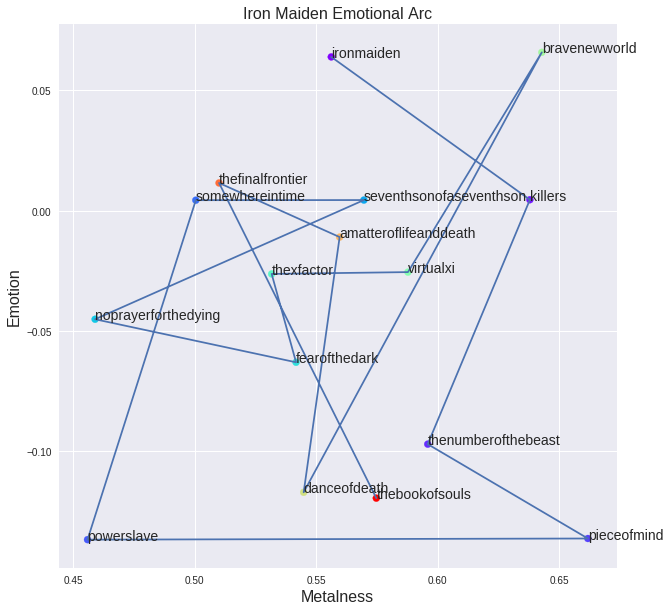

In [96]:
x = ironmaiden.metalness.values
y = ironmaiden.emotion.values
c = ironmaiden.year.values
l = ironmaiden.album_name.values

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.scatter(x,y,c=c, cmap="rainbow")


for xx,yy,ll in zip(x,y, l):
    plt.annotate(ll, xy=(xx,yy), fontsize=14)
    
plt.title("Iron Maiden Emotional Arc", fontsize=16)
plt.xlabel("Metalness", fontsize=16)
plt.ylabel("Emotion",fontsize=16)

plt.savefig("resources/ironmaiden_arc.png", bbox_inches='tight')

# Harry Potter 

In [66]:
import glob

In [89]:
hp = sorted(glob.glob("data/hp/*.txt"))

In [91]:
hps = []
for h in hp:
    with open(h, "r") as f:
        txt = f.read()

        hps.append(txt)

In [92]:
potter = pd.DataFrame(
    data={
        "text":hps,
        "book": [(h.split("/")[-1]).split(".")[0] for h in hp]
    }
)

potter["metalness"] = potter.text.apply(score_metal)
potter["emotion"] = potter.text.apply(score_emotion)

In [93]:
potter

,book,text,metalness,emotion
0,1-philosophers_stone,Harry Potter\n\nand the Sorcerer’s Stone\n\n\n...,-0.063631,-0.042140
1,2-chamber_of_secrets,Harry Potter\n\n\n\nand the Chamber of Secrets...,-0.100787,-0.052835
2,3-prisoner_of_azkaban,Harry Potter\n\nand the Prisoner of Azkaban\n\...,-0.094502,-0.054717
3,4-goblet_of_fire,Harry Potter\n\nand the Goblet Of Fire\n\n\n\n...,-0.109181,-0.043938
4,5-order_of_the_pheonix,Harry Potter\n\n\n\nand the Order of the Phoen...,-0.112357,-0.048852
5,6-half_blood_prince,Harry Potter\n\n\n\nand the Half-Blood Prince\...,-0.110859,-0.048167
6,7-deathly_hallows,Harry Potter\n\n\n\nand the Deathly Hallows\n\...,-0.037964,-0.075042


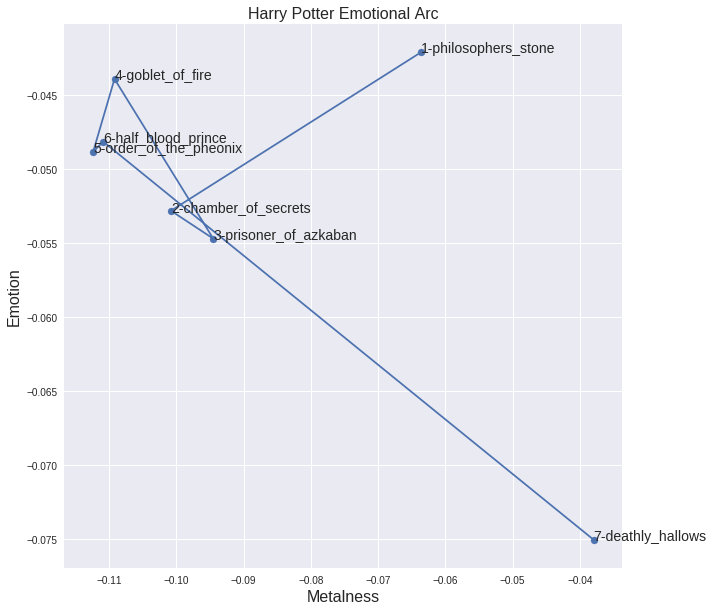

In [97]:
x = potter.metalness.values
y = potter.emotion.values
l = potter.book.values

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.scatter(x,y)


for xx,yy,ll in zip(x,y, l):
    plt.annotate(ll, xy=(xx,yy), fontsize=14)
    
plt.title("Harry Potter Emotional Arc", fontsize=16)
plt.xlabel("Metalness", fontsize=16)
plt.ylabel("Emotion",fontsize=16)

plt.savefig("resources/harrypotter_arc.png", bbox_inches='tight')